## Implementaion of the spike sorting algorithm



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.decomposition import PCA
from scipy import signal
from sklearn.cluster import KMeans

Insert the path of data in input_file

In [4]:
input_file='Data.txt'

In [5]:
data_str = [line.rstrip('\n') for line in open(input_file)]

raw_data1=[]
raw_data2=[]


elect1_abs=[]
elect2_abs=[]
for i in data_str:
    d1=float(i[i.find("\t"):])
    d2=float(i[:i.find("\t")])
    raw_data1.append( d1 )
    raw_data2.append( d2 )
    elect1_abs.append(abs(d1))
    elect2_abs.append(abs(d2))

In [4]:
threshold_1_3_5 = 3.5*statistics.stdev(raw_data1[:500])
threshold_2_3_5 = 3.5*statistics.stdev(raw_data2[:500])

threshold_1_5 = 5*statistics.stdev(raw_data1[:500])
threshold_2_5 = 5*statistics.stdev(raw_data2[:500])



In [5]:
def detect_peaks (thr,elect,raw_data):
    peaks=[]
    flag=0
    num_peaks=0
    skip=0
    peaksIndex=[]
    flag=0
    minimum=0
    for i in range(len(elect)-1):
    #    if skip>0:
    #        skip+=1
    #        if skip==49:
    #            skip=0
    #       continue
        if (elect[i]>thr):
          if flag==0:
              minimum=i
              flag=1
        else:
            if flag==1:
                maximum=max(elect[minimum:i])
                peaksIndex.append( (elect[minimum:i].index(maximum)) + minimum )
                num_peaks+=1
                skip=1
                flag=0

    for index in peaksIndex:
        peaks.append(raw_data[index])
        
    return peaksIndex,peaks    

In [6]:
def detected_spikes (peaksIndex,raw_data):
    spikes=np.array(raw_data[ peaksIndex[0]-24 : peaksIndex[0]+24  ])
    flag =0
    for i in peaksIndex:
        if flag==0:
            flag=1
            continue
        c=np.array(raw_data[i-24:i+24])
        spikes = np.vstack((spikes, c))
    return spikes    

In [7]:
def pca_spikes(spikes):
    
    pca = PCA(n_components=2)
    pca.fit(spikes)
    spikes_pca=pca.transform(spikes)
    y= np.arange(len(spikes))
    plt.figure(figsize=(10, 8))
    plt.scatter(spikes_pca[:, 0], spikes_pca[:, 1],marker='o')
    plt.xlim(min(spikes_pca[:, 0]),max(spikes_pca[:, 0]))
    plt.ylim(min(spikes_pca[:, 1]),max(spikes_pca[:, 1]))
    plt.xlabel('component1')
    plt.ylabel('component2')
    plt.title('Feature space')
    plt.show()
    return spikes_pca

In [8]:
def cluster_labels (spikes_pca,num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(spikes_pca)
    spikes_labels = kmeans.predict(spikes_pca)
    plt.figure(figsize=(10, 8))
    plt.scatter(spikes_pca[:, 0], spikes_pca[:, 1], c=spikes_labels, marker='o')
    plt.xlim(min(spikes_pca[:, 0]),max(spikes_pca[:, 0]))
    plt.ylim(min(spikes_pca[:, 1]),max(spikes_pca[:, 1]))
    plt.show()
    return spikes_labels

In [9]:
def marking_spikes(raw_data,peaks,peaksIndex,spikes_labels):
    x_values = range(20000)
    plt.plot(x_values,raw_data[:20000])

    #plt.plot(peaksIndex,peaks,'x',color='r')
    i=0
    while (peaksIndex[i]<=20000):
        if (spikes_labels[i]==0):
            plt.plot(peaksIndex[i],peaks[i],'*',color='r')
        else:
            plt.plot(peaksIndex[i],peaks[i],'*',color='g')
        i+=1    
    plt.figure(figsize=(10, 8))
    plt.show()

In [10]:
def average_spikes (spikes,spikes_labels):
    spikes_neoron1=[]
    spikes_neoron2=[]
    for i in range (len(spikes)):
        if spikes_labels[i]==0:
            spikes_neoron1.append(spikes[i])
        else:
            spikes_neoron2.append(spikes[i])

    neoron1=np.array(spikes_neoron1)
    neoron2=np.array(spikes_neoron2)
    avg_neoron1=neoron1.sum(axis=0)/len(spikes_neoron1)
    avg_neoron2=neoron2.sum(axis=0)/len(spikes_neoron2)
    plt.figure(figsize=(10, 8))
    plt.plot(avg_neoron1)
    plt.plot(avg_neoron2)

# To define your data:
    -For electrode 1>> assign electrode=1

    -For electrode 2>> assign electrode=2

    -For threshold=3.5*standard_deviation>> assign threshold=3.5

    -For threshold=3.5*standard_deviation>> assign threshold=5



In [18]:
##Choose the data and the threshold here from variables electrode,threshold
electrode=1
threshold=3.5

if (electrode==1):
    raw_data=raw_data1
    elect=elect1_abs
    if threshold==3.5:
        threshold=threshold_1_3_5
    else:
        threshold=threshold_1_5
else:
    raw_data=raw_data2
    elect=elect2_abs
    if threshold==3.5:
        threshold=threshold_2_3_5
    else:
        threshold=threshold_2_5

In [19]:
peaksIndex,peaks=detect_peaks (threshold,elect,raw_data) 

In [20]:
spikes=detected_spikes (peaksIndex,raw_data) #list of detected spikes

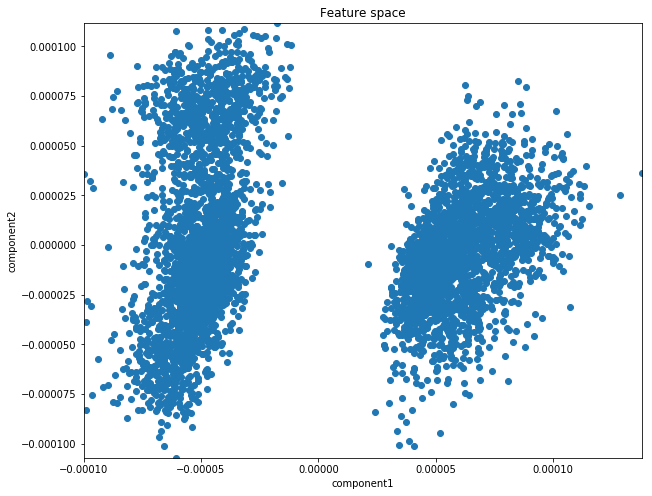

In [21]:
#Applying PCA to the detected spikes and plottiong the feature space
spikes_pca=pca_spikes(spikes)

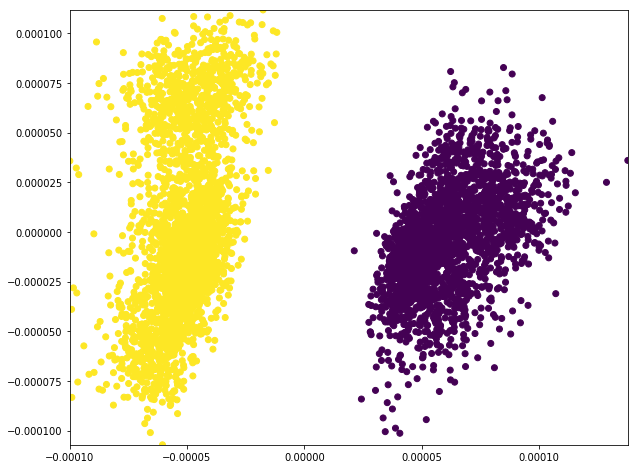

In [22]:
#Number of clusters that's identified by visual inspection of the feature space
num_clusters=2
spikes_labels=cluster_labels (spikes_pca,num_clusters)

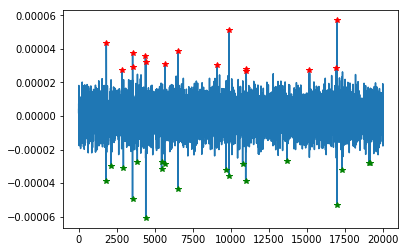

<Figure size 720x576 with 0 Axes>

In [23]:
#Marking the detected spikes of the first 20,000 samples of the raw data
marking_spikes(raw_data,peaks,peaksIndex,spikes_labels)

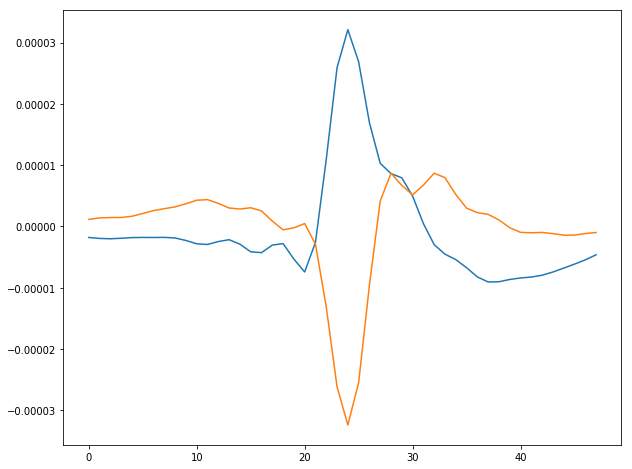

In [24]:
#Plotting the average spike of each neuron colored with different colors.
average_spikes (spikes,spikes_labels)